In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.io.wavfile import write
from scipy.signal import butter, lfilter, freqz
from scipy.fftpack import fft,rfft, rfftfreq

In [2]:
cd ../data

/Users/alex/Code/GitHub/SunSpots/data


### Files are sourced from SilSo (http://www.sidc.be/silso/dayssnplot)

SN_d_tot_V2.0.csv<br>
SN_ms_tot_V2.0.csv

In [3]:
sun = pd.read_csv('SN_d_tot_V2.0.csv', sep = ';')
sun.columns = ['Year', 'Month', 'Day', 'Fractional Date', 'SunSpot Count', "DailyStDev", "Observations", 'Indicator']

sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73960 entries, 0 to 73959
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             73960 non-null  int64  
 1   Month            73960 non-null  int64  
 2   Day              73960 non-null  int64  
 3   Fractional Date  73960 non-null  float64
 4   SunSpot Count    73960 non-null  int64  
 5   DailyStDev       73960 non-null  float64
 6   Observations     73960 non-null  int64  
 7   Indicator        73960 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


In [4]:
sun.head()

,Year,Month,Day,Fractional Date,SunSpot Count,DailyStDev,Observations,Indicator
0,1818,1,2,1818.004,-1,-1.0,0,1
1,1818,1,3,1818.007,-1,-1.0,0,1
2,1818,1,4,1818.010,-1,-1.0,0,1
3,1818,1,5,1818.012,-1,-1.0,0,1
4,1818,1,6,1818.015,-1,-1.0,0,1


I don't really need three columns when I can combine them and conver them to datetime

In [5]:
sun['Date'] = sun['Year'].map(str)+ '-' + sun['Month'].map(str) + '-' + sun['Day'].map(str)
sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73960 entries, 0 to 73959
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             73960 non-null  int64  
 1   Month            73960 non-null  int64  
 2   Day              73960 non-null  int64  
 3   Fractional Date  73960 non-null  float64
 4   SunSpot Count    73960 non-null  int64  
 5   DailyStDev       73960 non-null  float64
 6   Observations     73960 non-null  int64  
 7   Indicator        73960 non-null  int64  
 8   Date             73960 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 5.1+ MB


In [6]:
pd.to_datetime(sun['Date'], utc=False)

0       1818-01-02
1       1818-01-03
2       1818-01-04
3       1818-01-05
4       1818-01-06
           ...    
73955   2020-06-26
73956   2020-06-27
73957   2020-06-28
73958   2020-06-29
73959   2020-06-30
Name: Date, Length: 73960, dtype: datetime64[ns]

Drop the year, month and day columns and set a new order

In [7]:
sun = sun[['Date', 'SunSpot Count', 'DailyStDev', 'Observations', 'Indicator', 'Fractional Date'] ]
sun

,Date,SunSpot Count,DailyStDev,Observations,Indicator,Fractional Date
0,1818-1-2,-1,-1.0,0,1,1818.004
1,1818-1-3,-1,-1.0,0,1,1818.007
2,1818-1-4,-1,-1.0,0,1,1818.010
3,1818-1-5,-1,-1.0,0,1,1818.012
4,1818-1-6,-1,-1.0,0,1,1818.015
...,...,...,...,...,...,...
73955,2020-6-26,6,0.3,22,0,2020.485
73956,2020-6-27,4,0.9,12,0,2020.488
73957,2020-6-28,0,0.0,27,0,2020.490
73958,2020-6-29,0,0.0,37,0,2020.493


This plot below seems a little supicious. I haven't summed up any of the data but have what appears to be summations. Also, I'm not clear on what the part in white would be.

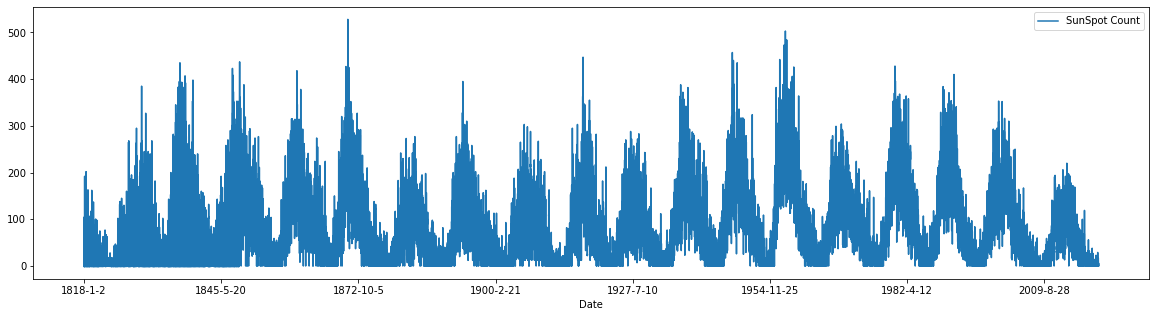

In [8]:
plt.figure(figsize = (20, 5))
ax = plt.gca()

sun.plot(kind='line', x='Date', y='SunSpot Count', ax=ax)
plt.show()

In [9]:
sun.describe()

,SunSpot Count,DailyStDev,Observations,Indicator,Fractional Date
count,73960.000000,73960.000000,73960.000000,73960.000000,73960.000000
mean,78.998053,6.902599,4.529597,0.998770,1919.250429
std,77.468362,4.786447,8.085959,0.035056,58.455787
min,-1.000000,-1.000000,0.000000,0.000000,1818.004000
25%,15.000000,2.900000,1.000000,1.000000,1868.626250
50%,58.000000,6.500000,1.000000,1.000000,1919.252000
75%,124.000000,10.000000,1.000000,1.000000,1969.873500
max,528.000000,77.700000,60.000000,1.000000,2020.496000


In [10]:
len(sun)

73960

Hunh. Well, that would seem to dispel my first concern. 

This is a good place to stop for the night. I think I want to look about casting the indicator as a bool and Observations and total SunSpots as integers. That should be faster, take less memory, and should be a bit clearer.


In [11]:
sun['Indicator'] = sun['Indicator'].astype(bool)
sun[['Observations', 'SunSpot Count']] = sun[['Observations', 'SunSpot Count']].astype(int)

In [12]:
window = 1000
sun['rolling'] = sun.iloc[:,1].rolling(window).mean()



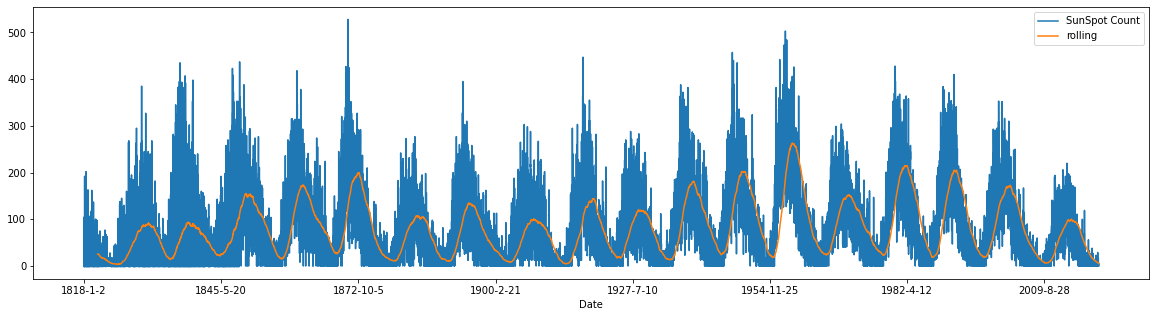

In [13]:
plt.figure(figsize = (20, 5))
ax = plt.gca()

sun.plot(kind='line', x='Date', y='SunSpot Count', ax=ax)
sun.plot(kind='line', x='Date', y='rolling', ax=ax)

plt.show()

In [14]:
data = sun[1:len(sun)]

In [15]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

In [16]:
t_n = 200
N = 200 #sample rate (in Hz) must equal last of x=np.linspace(0,10,300) below
T = t_n / N
f_s = 1/T #freq

x_value = np.linspace(0,t_n,N)

#dummy values
amplitudes = [1, 1, 1]
frequencies = [30, 10, 1]

y_values = [amplitudes[i]*np.sin(2*np.pi*frequencies[i]*x_value) for i in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)

colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

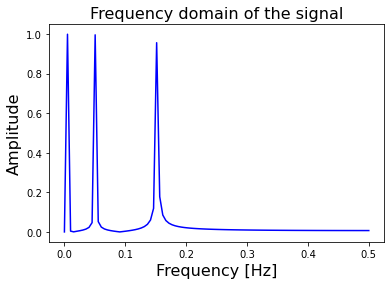

In [17]:
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

In [18]:
t_n = 200
N = 200 #sample rate (in Hz) must equal last of x=np.linspace(0,10,300) below
T = t_n / N
f_s = 1/T #freq

x_value = np.linspace(0,t_n,N)

In [19]:
scipy.fft.fft(sun['SunSpot Count'], n=None, axis=- 1, norm=None, overwrite_x=False, workers=None, plan=None)

array([5842696.             -0.j        ,
       -224722.57478482+628036.52588621j,
       -917885.06890598-232011.06237981j, ...,
       -301846.04525085-307461.62631971j,
       -917885.06890598+232011.06237981j,
       -224722.57478482-628036.52588621j])

It's been a while so a refresher on how FFT works would be useful

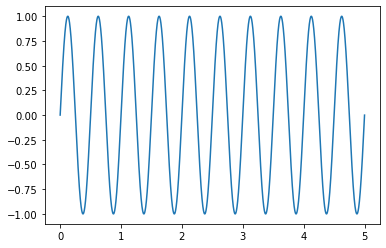

In [20]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y


# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION


# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [21]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone


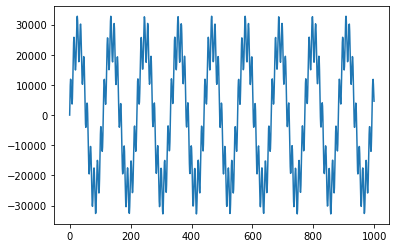

In [22]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [23]:
# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)


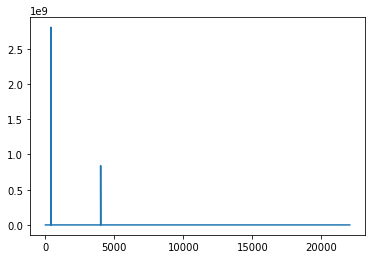

In [24]:
# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()


In [25]:
yf.size

220500

### Let's take a step back an use find_peaks to see if I can get that to lablel the values.
### I'm using the find_peaks and using the electrocardiogram dataset 

In [26]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np


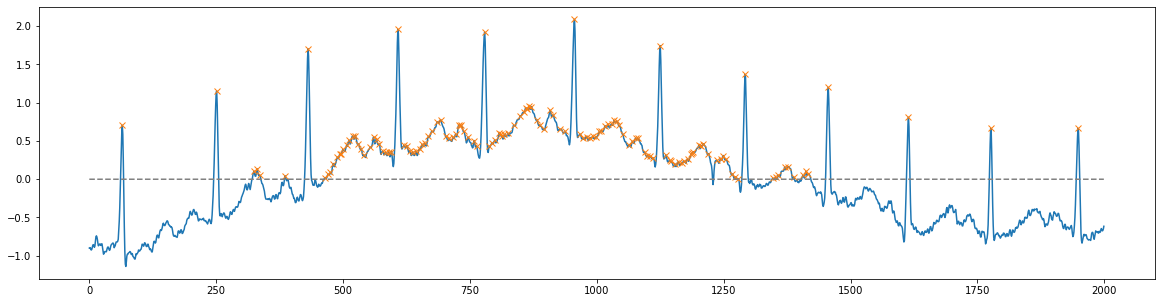

In [27]:
plt.figure(figsize = (20, 5))
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [28]:
p, q = peaks, x[peaks]

peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)


array([186, 180, 177, 171, 177, 169, 167, 164, 158, 162, 172])

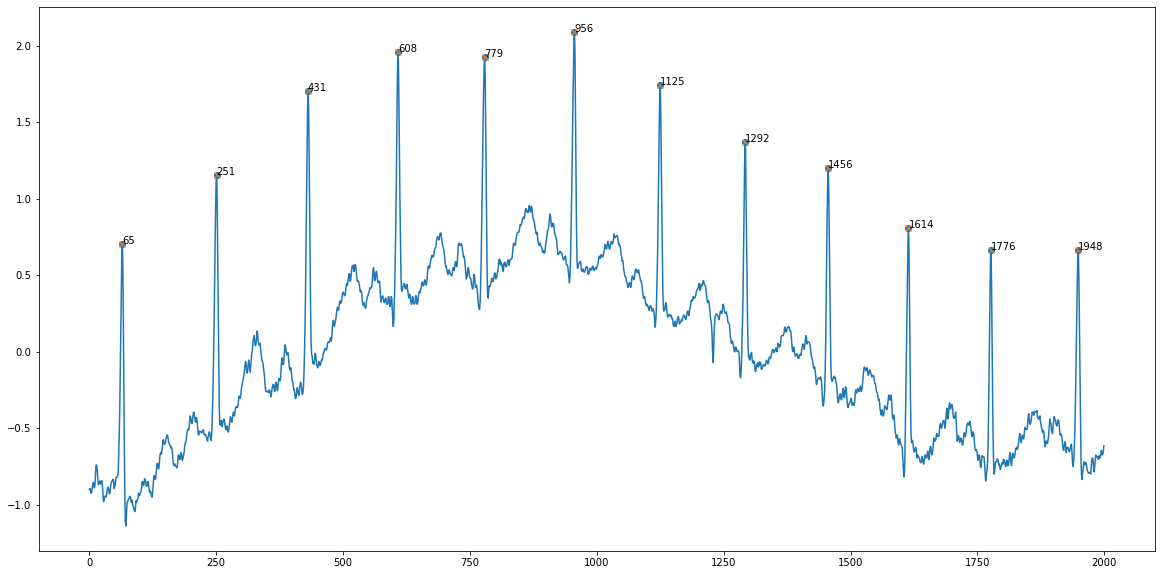

In [41]:
fig, ax = plt.subplots()
ax.scatter(p, q)
plt.gcf().set_size_inches(20, 10)
for i, txt in enumerate(p):
    ax.annotate(txt, (p[i], q[i]))


peaks, _ = find_peaks(x, distance=100)

x = electrocardiogram()[2000:4000]

plt.plot(x)
plt.plot(peaks, x[peaks], 'x')

plt.show()

In [30]:
fft = np.fft.fft(sun['SunSpot Count'])

for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))

Value at index 0:	(-224722.57478481994+628036.5258862108j) 
Value at index 73959:	(-224722.57478481997-628036.5258862107j)
Value at index 1:	(-917885.0689059759-232011.06237980953j) 
Value at index 73958:	(-917885.0689059759+232011.0623798095j)


### Next step --

 1. Take the numbers from `cell 29` and adapt the code to display the frequencies in `cell 24` and `cell 17`
 2. That should allow me to see the frequencies in the test case. Might need a periodic filter to take out the non-peaks
 3. That souuld give me a start on finding the freqs for the `sun` dataset

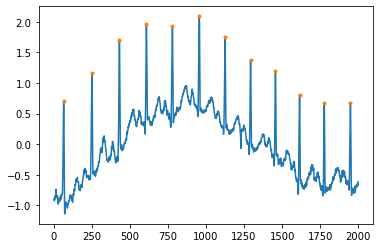

In [31]:
x = electrocardiogram()[2000:4000]

peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)

plt.plot(x)
plt.plot(peaks, x[peaks], '.')
plt.show()

In [32]:
p, q = peaks, x[peaks]

peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)

array([186, 180, 177, 171, 177, 169, 167, 164, 158, 162, 172])

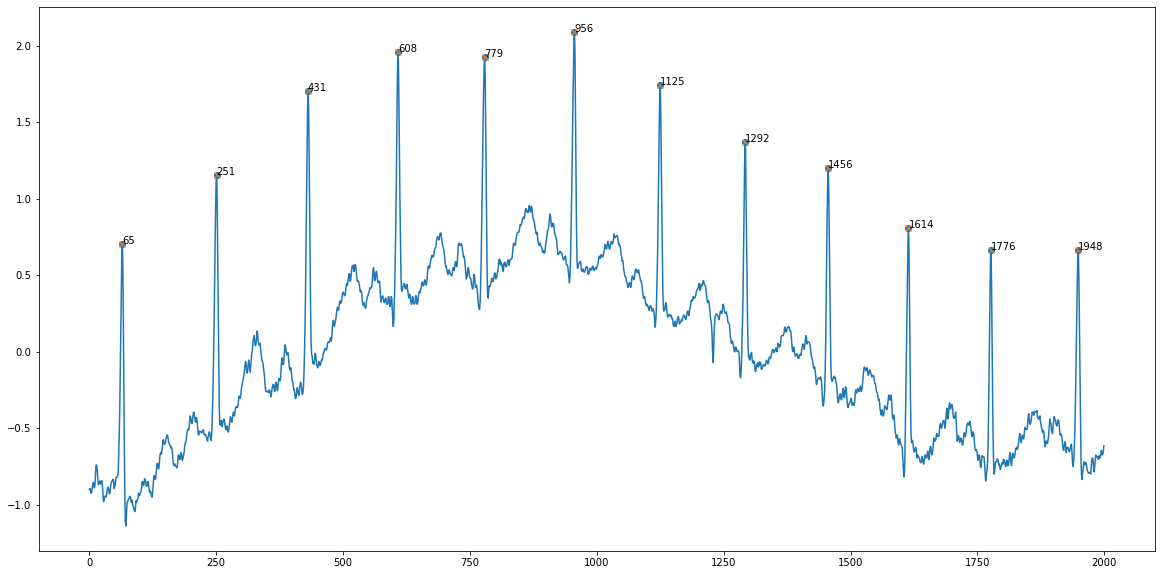

In [33]:
fig, ax = plt.subplots()
ax.scatter(p, q)
plt.gcf().set_size_inches(20, 10)
for i, txt in enumerate(p):
    ax.annotate(txt, (p[i], q[i]))


plt.plot(x)
plt.plot(peaks, x[peaks], 'x')

plt.show()